# Comparison of Boercker and More Ornsten-Zernike 

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

# from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.hnc import  Integral_Equation_Solver as OZ
from hnc.hnc.hnc_BandM import Integral_Equation_Solver as IET
from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs, rs_from_n

from pandas import read_csv

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['figure.figsize'] = 8, 4.9443
mpl.rcParams['figure.dpi'] = 100


In [179]:
Γi = 10
Γe = 10

Ti = 1*eV_to_AU
Te = Γi/Γe*Ti
print(f"T_i = {Ti*AU_to_K:0.2f} [K]")
print(f"T_e = {Te*AU_to_K:0.2f} [K]")

Zi, Ze = 1, 1

ri = Zi**2/Ti/Γi
re = Ze**2/Te/Γe

ni = n_from_rs(ri)
ne = n_from_rs(re)

m_i = m_e*1

Qsquare_matrix = np.array( [[Ze**2, Zi*Ze ],[Zi*Ze, Zi**2]])
Qsquare_matrix


T_i = 11604.53 [K]
T_e = 11604.53 [K]


array([[1, 1],
       [1, 1]])

In [187]:
n_in_rs_array = np.array([ 3/(4*π), 3/(4*π)] )
T_AU_array = np.array([Te, Ti])
mass_array = np.array([m_e, m_i])
# New solver
iet = IET(2, n_in_rs_array, T_AU_array, mass_array, κ_screen=0.0, kappa_multiscale=0.0 , R_max=25.0, N_bins=512, use_U00_closure=True )
iet.set_u_matrix(Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:])

# Old solver
oz = OZ(2, np.ones((2,2)) , n_in_rs_array, np.ones((2,2))*Ti, mass_array, kappa=np.zeros((2,2)), kappa_multiscale=0.0 , R_max=25.0, N_bins=512)
oz.set_βu_matrix(Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:])


In [188]:
iet.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 1.257e+01
1: Change in U_r: 2.414e-03, HNC Error: 2.955e-01, Total Error: 1.177e+01
2: Change in U_r: 2.359e-03, HNC Error: 2.956e-01, Total Error: 1.103e+01
3: Change in U_r: 2.308e-03, HNC Error: 2.958e-01, Total Error: 1.034e+01
4: Change in U_r: 2.261e-03, HNC Error: 2.959e-01, Total Error: 9.683e+00
5: Change in U_r: 2.217e-03, HNC Error: 2.960e-01, Total Error: 9.071e+00
6: Change in U_r: 2.176e-03, HNC Error: 2.962e-01, Total Error: 8.499e+00
7: Change in U_r: 2.137e-03, HNC Error: 2.963e-01, Total Error: 7.963e+00
8: Change in U_r: 2.100e-03, HNC Error: 2.965e-01, Total Error: 7.461e+00
9: Change in U_r: 2.066e-03, HNC Error: 2.967e-01, Total Error: 6.993e+00
10: Change in U_r: 2.033e-03, HNC Error: 2.968e-01, Total Error: 6.554e+00
11: Change in U_r: 2.002e-03, HNC Error: 2.970e-01, Total Error: 6.145e+00
12: Change in U_r: 1.973e-03, HNC Error: 2.971e-01, Total Error: 5.763e+00
13: Change in U_r: 1.945e-03, HNC Error: 2.973e-01, Total Error: 

0

In [189]:
oz.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 8.488e-01
1: Change in c_r: 1.269e-02, HNC Error: 3.796e-02, Total Error: 7.718e-01
2: Change in c_r: 1.187e-02, HNC Error: 3.361e-02, Total Error: 7.016e-01
3: Change in c_r: 1.111e-02, HNC Error: 3.065e-02, Total Error: 6.375e-01
4: Change in c_r: 1.039e-02, HNC Error: 2.837e-02, Total Error: 5.791e-01
5: Change in c_r: 9.711e-03, HNC Error: 2.649e-02, Total Error: 5.259e-01
6: Change in c_r: 9.076e-03, HNC Error: 2.489e-02, Total Error: 4.775e-01
7: Change in c_r: 8.481e-03, HNC Error: 2.348e-02, Total Error: 4.334e-01
8: Change in c_r: 7.922e-03, HNC Error: 2.223e-02, Total Error: 3.933e-01
9: Change in c_r: 7.399e-03, HNC Error: 2.110e-02, Total Error: 3.569e-01
10: Change in c_r: 6.908e-03, HNC Error: 2.007e-02, Total Error: 3.238e-01
11: Change in c_r: 6.449e-03, HNC Error: 1.913e-02, Total Error: 2.937e-01
12: Change in c_r: 6.019e-03, HNC Error: 1.827e-02, Total Error: 2.664e-01
13: Change in c_r: 5.617e-03, HNC Error: 1.747e-02, Total Error: 

0

(<Figure size 2000x1200 with 4 Axes>,
 array([[<Axes: title={'center': ', $\\Gamma_{ 0,0 }$ = 1.00'}, ylabel='$c(r/r_s)$'>,
         <Axes: title={'center': ', $\\Gamma_{ 0,1 }$ = 1.00'}>],
        [<Axes: title={'center': ', $\\Gamma_{ 1,0 }$ = 1.00'}, xlabel='$r/r_s$', ylabel='$c(r/r_s)$'>,
         <Axes: title={'center': ', $\\Gamma_{ 1,1 }$ = 1.00'}, xlabel='$r/r_s$'>]],
       dtype=object))

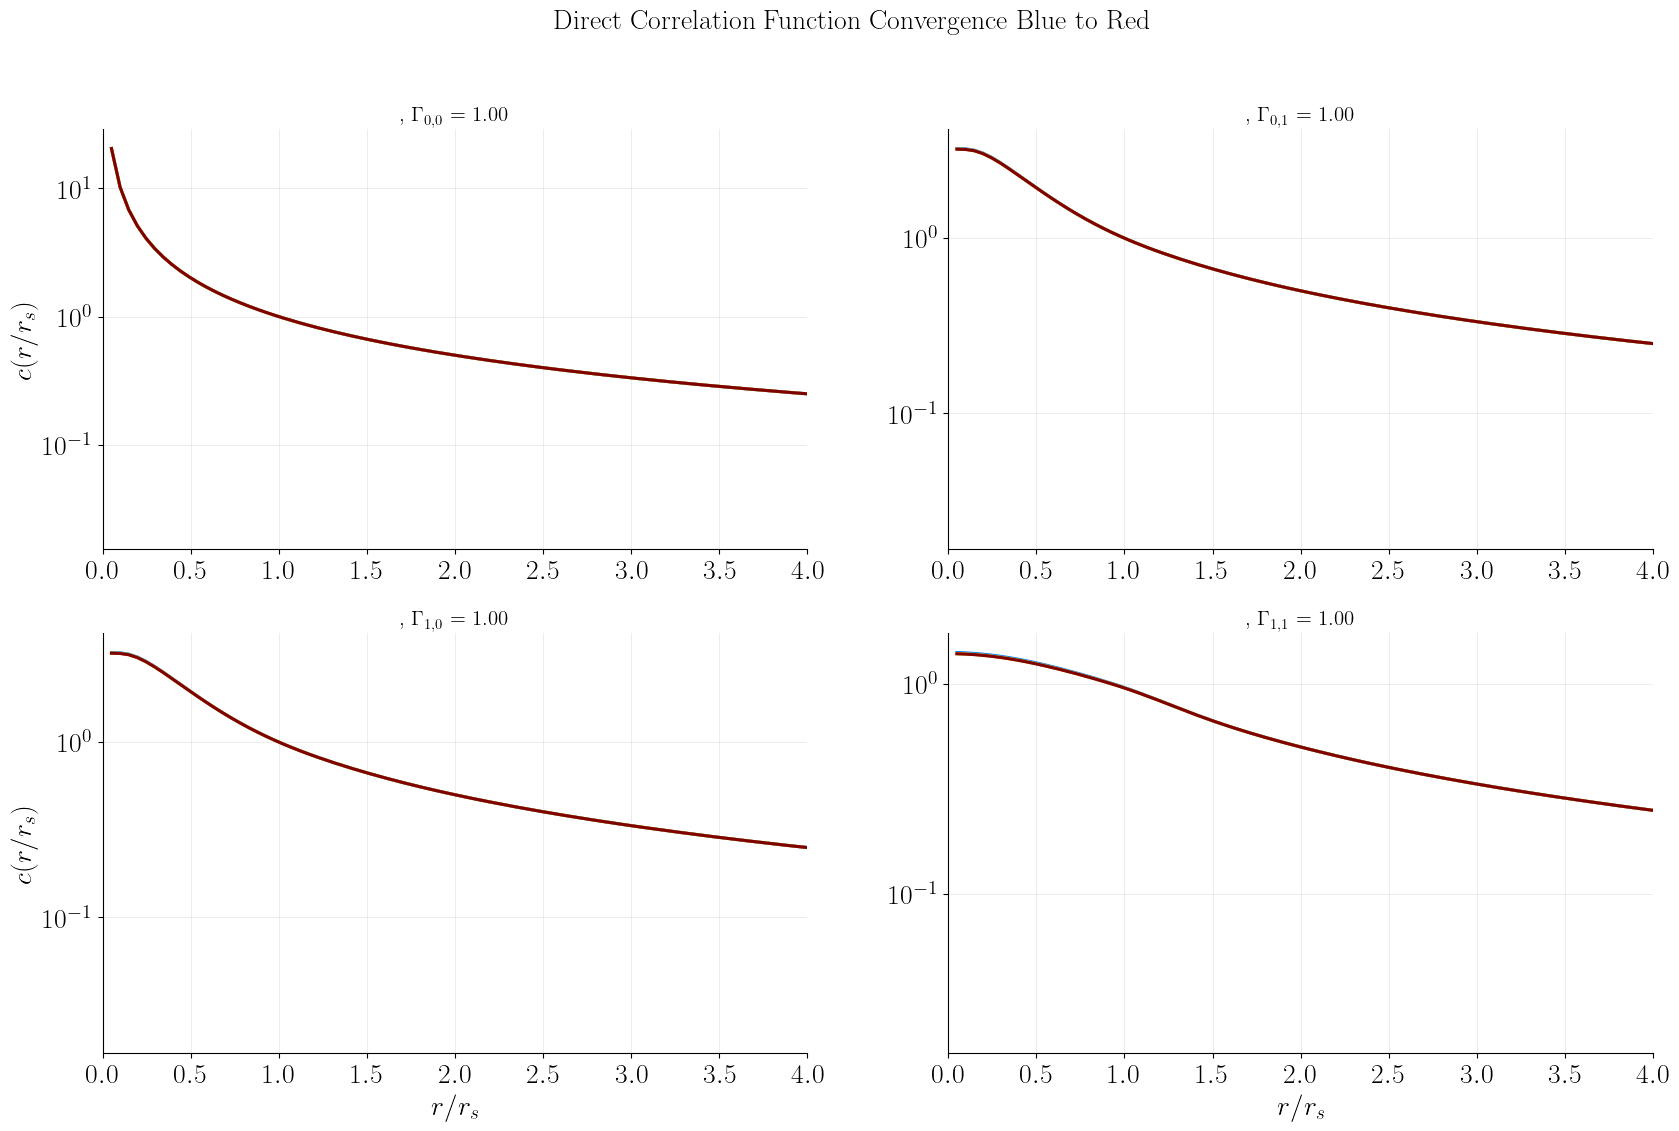

In [168]:
iet.plot_species_convergence_c(n_slices = len(iet.h_r_matrix_list[::100]))

(<Figure size 2000x1200 with 4 Axes>,
 array([[<Axes: title={'center': ', $\\Gamma_{ 0,0 }$ = 1.00'}, ylabel='$g(r/r_s)$'>,
         <Axes: title={'center': ', $\\Gamma_{ 0,1 }$ = 1.00'}>],
        [<Axes: title={'center': ', $\\Gamma_{ 1,0 }$ = 1.00'}, xlabel='$r/r_s$', ylabel='$g(r/r_s)$'>,
         <Axes: title={'center': ', $\\Gamma_{ 1,1 }$ = 1.00'}, xlabel='$r/r_s$'>]],
       dtype=object))

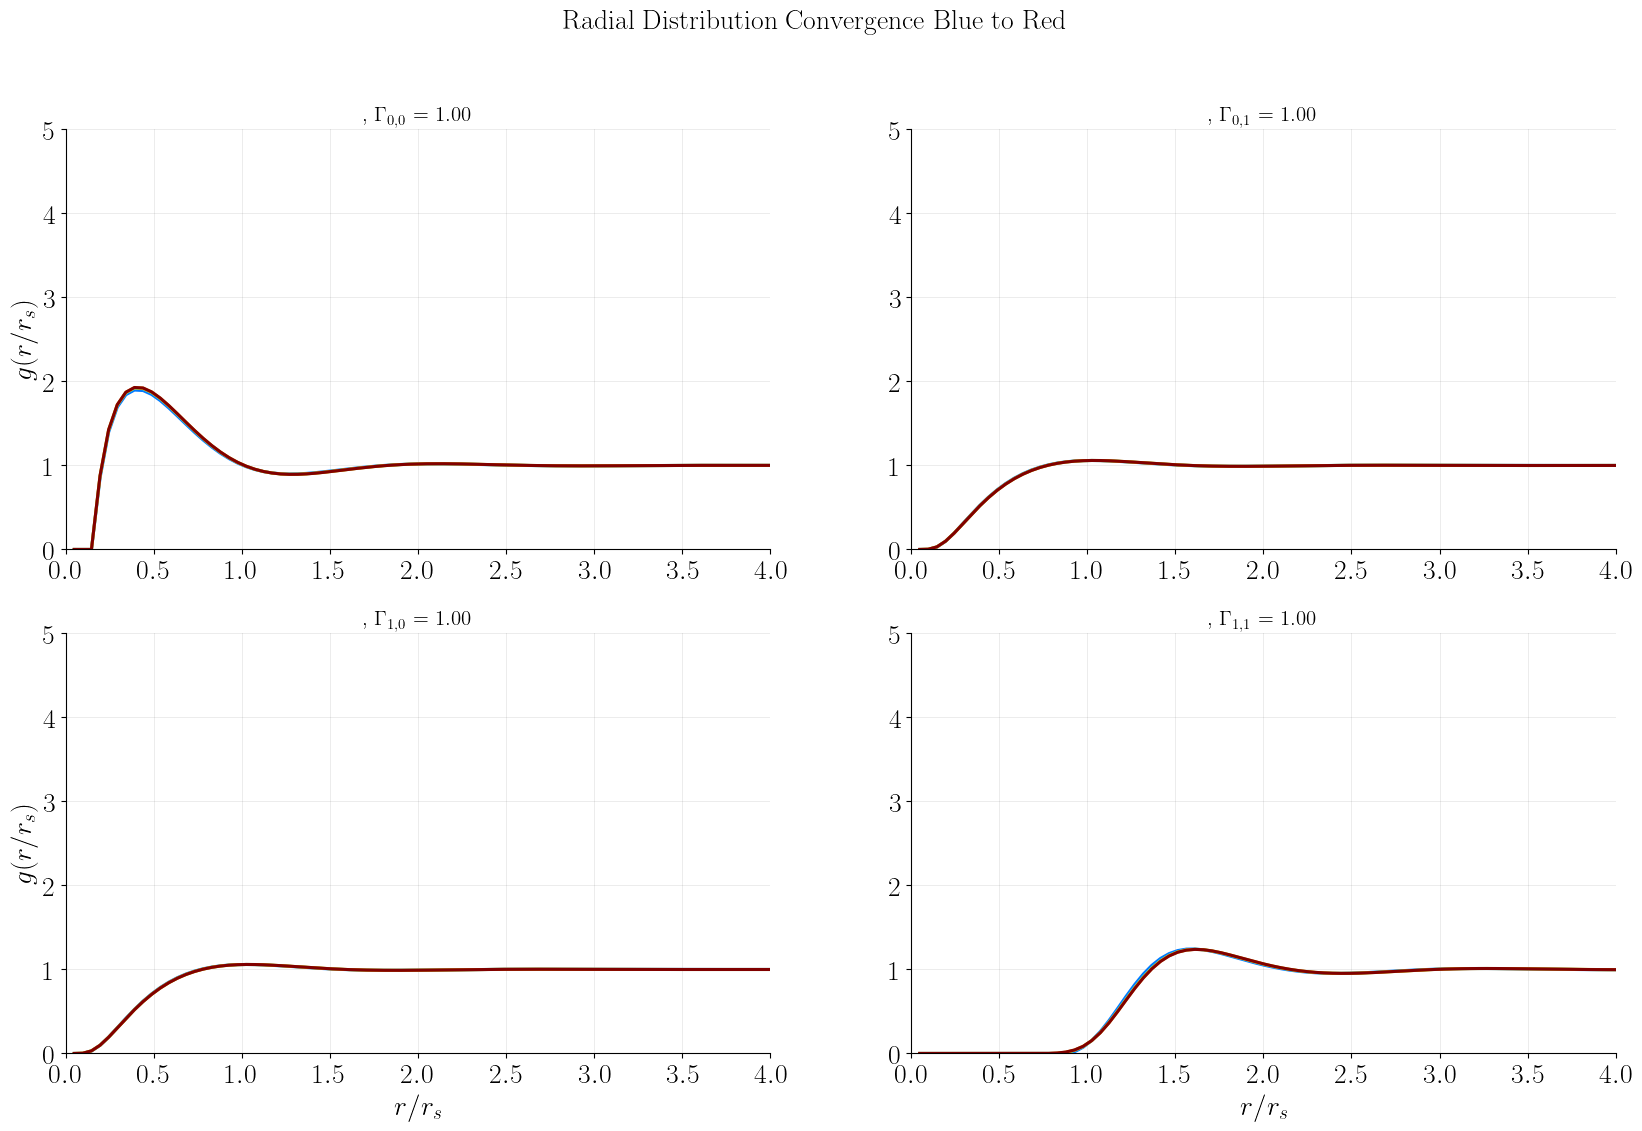

In [169]:
iet.plot_species_convergence_g(n_slices = len(iet.h_r_matrix_list[::100]))

axs


/home/zach/plasma/hnc/hnc/hnc_BandM.py:1164: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  


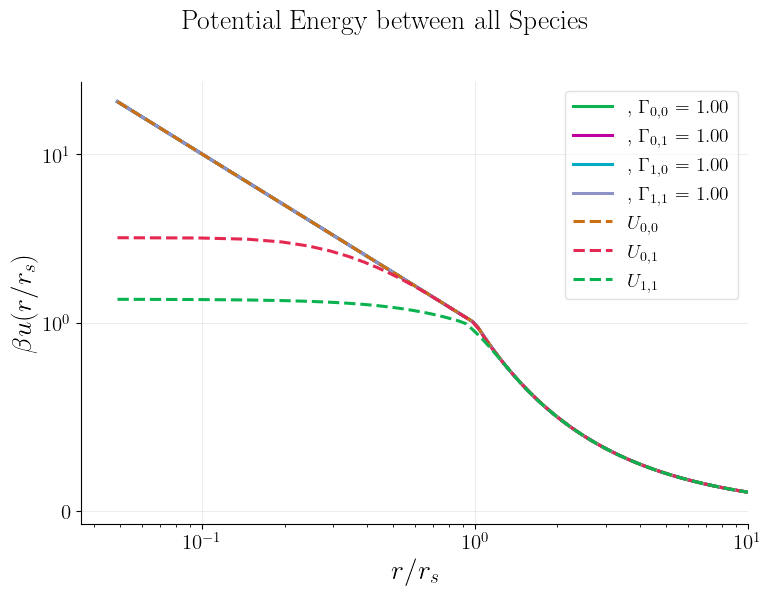

In [170]:
fig, ax =  iet.plot_u_all_species()
ax.plot(iet.r_array, iet.U_r_matrix[0,0],'--', label=r"$U_{0,0}$")
ax.plot(iet.r_array, iet.U_r_matrix[0,1],'--', label=r"$U_{0,1}$")
ax.plot(iet.r_array, iet.U_r_matrix[1,1],'--', label=r"$U_{1,1}$")
plt.legend(loc='upper right')

### Data from Nathaniel and Scott

In [191]:
from pandas import read_csv

# gii_data = read_csv("Shaffer2017_Fig2c.txt", delim_whitespace=True, header=2)
gii_data = read_csv("Shaffer2017_Fig2a.txt", delim_whitespace=True, header=2)

(0.0, 4.0)

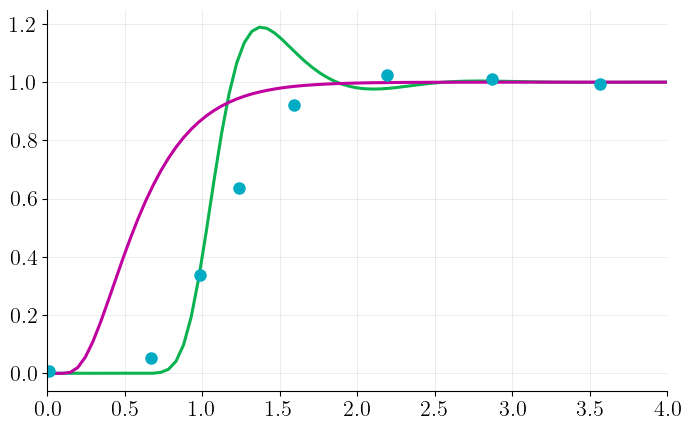

In [193]:
fig, ax = plt.subplots()


ax.plot(iet.r_array, iet.h_r_matrix[1,1]+1)
ax.plot(oz.r_array, oz.h_r_matrix[1,1]+1)
ax.plot(gii_data['r/a'], gii_data['gii'],'o')
ax.set_xlim(0,4)

### Single Species Check

In [131]:
n_in_rs_array = np.array([ 3/(4*π), 3/(4*π)] )
T_AU_array = np.array([Te, Ti])
mass_array = np.array([m_e, m_i])
iet = IET(1, n_in_rs_array[0:1], T_AU_array[0:1], mass_array[0:1], κ_screen=0 )

iet.HNC_solve(num_iterations=1e4, tol=1e-6, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 2.382e+48
1: Change in U_r: 1.253e+02, HNC Error: 3.925e-01, Total Error: 1.578e+46
2: Change in U_r: 3.269e+01, HNC Error: 3.744e-01, Total Error: 1.051e+44
3: Change in U_r: 1.497e+01, HNC Error: 3.611e-01, Total Error: 7.018e+41
4: Change in U_r: 8.892e+00, HNC Error: 3.508e-01, Total Error: 4.716e+39
5: Change in U_r: 6.124e+00, HNC Error: 3.424e-01, Total Error: 3.101e+37
6: Change in U_r: 4.630e+00, HNC Error: 3.349e-01, Total Error: 2.088e+35
7: Change in U_r: 3.719e+00, HNC Error: 3.290e-01, Total Error: 1.339e+33
8: Change in U_r: 3.121e+00, HNC Error: 3.254e-01, Total Error: 7.875e+30
9: Change in U_r: 2.700e+00, HNC Error: 3.227e-01, Total Error: 4.455e+28
10: Change in U_r: 2.390e+00, HNC Error: 3.199e-01, Total Error: 2.849e+26
11: Change in U_r: 2.152e+00, HNC Error: 3.172e-01, Total Error: 2.056e+24
12: Change in U_r: 1.962e+00, HNC Error: 3.155e-01, Total Error: 1.549e+22
13: Change in U_r: 1.808e+00, HNC Error: 3.145e-01, Total Error: 

1

(<Figure size 1000x600 with 1 Axes>,
 array([[<Axes: title={'center': ', $\\Gamma_{ 0,0 }$ = 1.00'}, xlabel='$r/r_s$', ylabel='$g(r/r_s)$'>]],
       dtype=object))

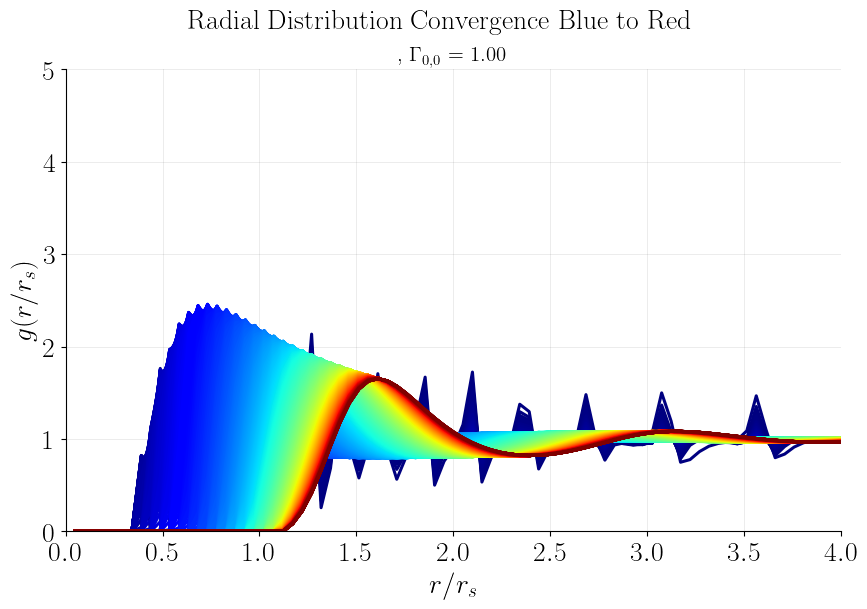

In [132]:
iet.plot_species_convergence_g(n_slices = len(iet.h_r_matrix_list[::10]))

axs


/home/zach/plasma/hnc/hnc/hnc_BandM.py:1164: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,10)


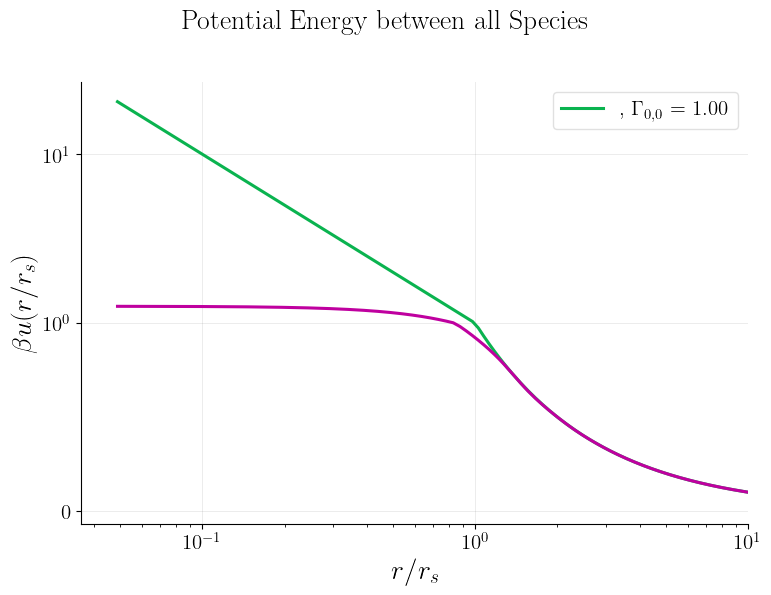

In [133]:
fig, ax =  iet.plot_u_all_species()
ax.plot(iet.r_array, iet.U_r_matrix[0,0])
